# Data Preparation: Forecastability Estimation

- The more regular and repeatable patterns a time series has, the easier it is to forecast. 

- Inspection of the seasonality, use the Autocorrelation Function (ACF) plot. When there is a strong seasonal pattern, the ACF plot usually reveals definitive repeated spikes at the multiples of the seasonal window. Alternately, if you want a statistical test, the CHTest can determine if seasonal differencing is required to stationarize the series. For example, the drug sales time series is a monthly series with patterns repeating every year. So, you can see spikes at 12th, 24th, 36th.. lines. In real word datasets such strong patterns are hardly noticed and can get distorted by any noise, so you need a careful eye to capture these patterns. 

- The ‘Approximate Entropy’ can be used to quantify the regularity and unpredictability of fluctuations in a time series. **The higher the approximate entropy, the more difficult it is to forecast it.**

- Another better alternative is the ‘Sample Entropy’. Sample Entropy is similar to approximate entropy but is more consistent in estimating the complexity even for smaller time series. 

- For example, a random time series with fewer data points can have a lower ‘approximate entropy’ than a more ‘regular’ time series, whereas, a longer random time series will have a higher ‘approximate entropy’. Sample Entropy handles this problem nicely (see below)

https://en.wikipedia.org/wiki/Approximate_entropy

https://en.wikipedia.org/wiki/Sample_entropy

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

## Load data

In [2]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv"
sunspots_df = pd.read_csv(url, parse_dates=["date"], index_col="date")
url2 = "https://raw.githubusercontent.com/selva86/datasets/master/a10.csv"
a10_df = pd.read_csv(url2, parse_dates=["date"], index_col="date")

rand_small = np.random.randint(0, 100, size=36)
rand_big = np.random.randint(0, 100, size=136)

## Autocorrelation Plot for Seasonality

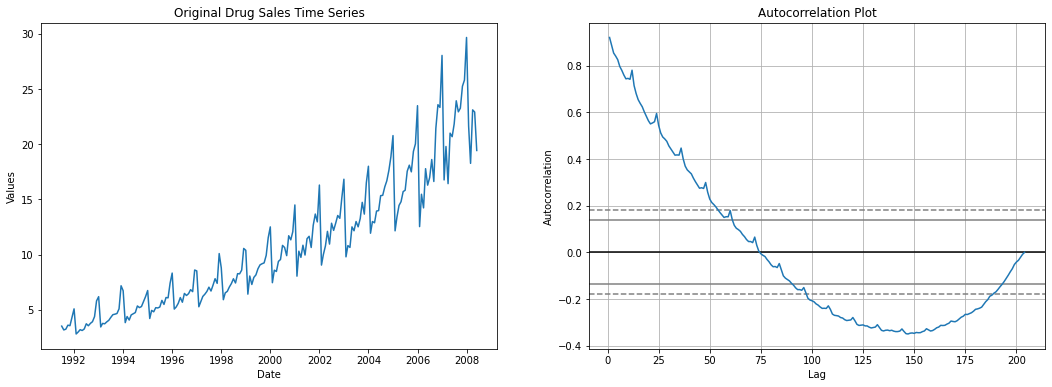

In [3]:
# plot original next to deseasonalized time series
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

axes[0].set_title("Original Drug Sales Time Series")
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Values')
axes[0].plot(a10_df.index, a10_df.loc[:, "value"])

axes[1].set_title("Autocorrelation Plot")
autocorrelation_plot(a10_df.loc[:, "value"].tolist(), ax=axes[1])

plt.show()

## Approximate Entropy

In [4]:
def AproximateEntropy(U, m, r):
    """Compute Aproximate entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))

    N = len(U)
    return abs(_phi(m+1) - _phi(m))

In [5]:
print(AproximateEntropy(sunspots_df.value, m=2, r=0.2*np.std(sunspots_df.value)))
print(AproximateEntropy(a10_df.value, m=2, r=0.2*np.std(a10_df.value)))
print(AproximateEntropy(rand_small, m=2, r=0.2*np.std(rand_small)))
print(AproximateEntropy(rand_big, m=2, r=0.2*np.std(rand_big)))

0.6514704970333534
0.5374775224973489
0.3196249868005703
0.6950195242780142


## Sample Entropy

In [6]:
def SampleEntropy(U, m, r):
    """Compute Sample entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for j in range(len(x)) if i != j and _maxdist(x[i], x[j]) <= r]) for i in range(len(x))]
        return sum(C)

    N = len(U)
    return -np.log(_phi(m+1) / _phi(m))

In [7]:
print(SampleEntropy(sunspots_df.value, m=2, r=0.2*np.std(sunspots_df.value)))
print(SampleEntropy(a10_df.value, m=2, r=0.2*np.std(a10_df.value)))
print(SampleEntropy(rand_small, m=2, r=0.2*np.std(rand_small)))
print(SampleEntropy(rand_big, m=2, r=0.2*np.std(rand_big)))

0.7853311366380039
0.41887013457621214
2.4849066497880004
3.1135153092103742


In [8]:
del sys.path[0]